# 核桃编程体验课程家访电话ab实验


## 1. 实验背景

核桃编程是一家专注于青少年编程教育的科技公司，致力于通过创新的教学模式和先进的技术手段，提升学生的编程能力和逻辑思维。公司提供体验课程，希望通过短期学习吸引用户转化为长期正价课程的付费学员。为了进一步提升用户体验课程的续费表现，核桃编程决定在体验课程期间进行一项教学服务优化实验。实验的核心是在课程中加入“家访电话”的动作，通过班主任与家长的沟通，增强家长对课程的了解和信任，从而提高用户的续费意愿。

## 2. 实验目的
通过A/B测试，验证家访电话动作对用户续费表现的有效性，分析实验组和对照组在续报率上的差异，并评估家访电话在不同干扰因素下的效果差异。最终，为核桃编程优化教学服务、提高续费率提供数据支持和决策依据。

## 3. 设计实验
### 3.1 建立假设
- 零假设： 有家访电话和无家访电话用户的续费表现基本相同，$H_0: p = p_0$
- 备择假设： 有家访电话和无家访电话用户的续费表现不同，$H_a: p \ne p_0$

### 3.2 核心指标（KPI）
- 续费率（R）： 体验课结束后，用户续报长期正价课程的比例。$R = \frac{\text{续费人数}}{\text{体验课总人数}}$

### 3.2 划分实验组和对照组
- 实验组：班主任在课程期间额外进行家访电话，了解学员学习情况、给予针对性建议，增强学员的参与感与归属感。
- 对照组：正常授课流程，无额外家访电话干预。

### 3.3 计算实验最小样本量
#### 3.3.1 生成历史数据并计算历史续报率

In [1]:
import pandas as pd
import numpy as np

np.random.seed(41)

# 定义数据量
num_months = 3
num_periods_per_month = 2
num_students_per_period = 20000
num_students = num_months * num_periods_per_month * num_students_per_period
num_teachers = 100 

# 定义销售水平、城市线级和流量渠道
sales_level_range = (5, 10)  # 销售水平（续报率）在5%-10%之间
city_tiers = ['一线', '新一线', '二线', '三线', '四线', '五线']
traffic_channels = ["自有流量", "社群营销", "口碑推荐", "广告投放", "KOL推广", "第三方合作"]

# 随机将学生分配给老师
teacher_ids = np.random.choice(range(1, num_teachers + 1), num_students)

# 为每个老师分配一个固定的销售水平
teacher_sales_levels = np.random.uniform(*sales_level_range, num_teachers)

# 为每个学生分配对应老师的销售水平
sales_levels = [teacher_sales_levels[teacher_id - 1] for teacher_id in teacher_ids]

# 随机生成城市线级和流量渠道
cities = np.random.choice(city_tiers, num_students,p=[0.2, 0.25, 0.2, 0.15, 0.1, 0.1])
channels = np.random.choice(traffic_channels, num_students,p=[0.3, 0.3, 0.2, 0.1, 0.05, 0.05])

# 为每个学生生成期数（年-月-期数）
periods = []
for month in range(10, 13):
    for period in range(1, num_periods_per_month + 1):
        periods.extend([f"2024-{month:02d}-{period}"] * num_students_per_period)

# 创建DataFrame
data = pd.DataFrame({
    '学生ID': range(1, num_students + 1),
    '老师ID': teacher_ids,
    '销售水平': sales_levels,
    '城市线级': cities,
    '流量渠道': channels,
    '期数': periods
})

# 根据销售水平、城市线级和流量渠道生成续报率
city_tier_impact = {'一线': 1.1, '新一线': 1.05, '二线': 1.0, '三线': 0.95, '四线': 0.9, '五线': 0.85}
channel_impact = {
    "自有流量": 1.2, "社群营销": 1.15, "口碑推荐": 1.25, "广告投放": 1.0, "KOL推广": 0.9, "第三方合作": 0.85
}

teacher_weight = 1.4  # 销售水平的权重
city_tier_weight = 1 # 城市线级的权重
channel_weight = 0.7  # 流量渠道的权重

# 生成最终的续报结果（1=续报，0=未续报）
data['续报结果'] = np.random.binomial(1, data.apply(lambda row: (row['销售水平'] * teacher_weight * 
                                                               city_tier_impact[row['城市线级']] * city_tier_weight * 
                                                               channel_impact[row['流量渠道']] * channel_weight / 100), axis=1))
data.head(10)

,学生ID,老师ID,销售水平,城市线级,流量渠道,期数,续报结果
0,1,65,5.511154,新一线,社群营销,2024-10-1,0
1,2,36,5.290780,一线,广告投放,2024-10-1,1
2,3,13,6.638288,一线,自有流量,2024-10-1,0
3,4,99,8.657095,三线,自有流量,2024-10-1,0
4,5,81,8.402225,新一线,社群营销,2024-10-1,0
5,6,66,8.456586,二线,口碑推荐,2024-10-1,0
6,7,90,9.806544,三线,自有流量,2024-10-1,0
7,8,24,7.854014,新一线,社群营销,2024-10-1,0
8,9,86,8.259173,新一线,口碑推荐,2024-10-1,0
9,10,27,9.805642,三线,自有流量,2024-10-1,0


In [2]:
data.describe()

,学生ID,老师ID,销售水平,续报结果
count,120000.000000,120000.000000,120000.000000,120000.000000
mean,60000.500000,50.584233,7.538238,0.085683
std,34641.160489,28.847183,1.430359,0.279897
min,1.000000,1.000000,5.136080,0.000000
25%,30000.750000,26.000000,6.333530,0.000000
50%,60000.500000,51.000000,7.604123,0.000000
75%,90000.250000,76.000000,8.774419,0.000000
max,120000.000000,100.000000,9.889011,1.000000


In [3]:
# 计算平均续报率
average_renewal_rate = data['续报结果'].mean()
print(f"平均续报率: {average_renewal_rate:.4f}")

平均续报率: 0.0857


历史平均续报率为8.57%，我们希望通过电话家访可以提升2%的续报率

#### 3.3.2 计算最小样本量
- 置信水平 $\alpha$ = 0.05
- 统计功效 $\beta$ = 0.15
- 组间预期差值 $\delta$ = 0.02 

In [4]:
import statsmodels.stats.api as sms
from math import ceil
#基于历史续报率和预期差值计算effect size
effect_size = sms.proportion_effectsize(0.0857, 0.1057)   
required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.80, 
    alpha=0.05, 
    ratio=1
    )                                                 
#计算样本数量
required_n = ceil(required_n)                                               
print(required_n)

3388


实验中每一组所需的最小样本量是3388，总共需要抽取6776个样本参与实验

## 4. 收集实验数据

### 4.1 生成实验期间所有学生的信息

In [5]:
import pandas as pd
import numpy as np

# 设置随机种子以保证结果可复现
np.random.seed(41)

# 定义数据量
num_months = 1  
num_periods_per_month = 2  
num_students_per_period = 20000  
num_students = num_months * num_periods_per_month * num_students_per_period  
num_teachers = 100  

# 定义销售水平、城市线级和流量渠道
sales_level_range = (5, 10) 
city_tiers = ['一线', '新一线', '二线', '三线', '四线', '五线']
traffic_channels = ["自有流量", "社群营销", "口碑推荐", "广告投放", "KOL推广", "第三方合作"]

# 随机将学生分配给老师
teacher_ids = np.random.choice(range(1, num_teachers + 1), num_students)

# 为每个老师分配一个固定的销售水平
teacher_sales_levels = np.random.uniform(*sales_level_range, num_teachers)

# 为每个学生分配对应老师的销售水平
sales_levels = [teacher_sales_levels[teacher_id - 1] for teacher_id in teacher_ids]

# 随机生成城市线级和流量渠道
cities = np.random.choice(city_tiers, num_students, p=[0.2, 0.25, 0.2, 0.15, 0.1, 0.1])
channels = np.random.choice(traffic_channels, num_students, p=[0.3, 0.3, 0.2, 0.1, 0.05, 0.05])

# 为每个学生生成期数（年-月-期数），实验期为一个月（10月或11月），两期课程
periods = []
for period in range(1, num_periods_per_month + 1):
    periods.extend([f"2025-01-{period}"] * num_students_per_period)

# 创建实验数据的DataFrame
experiment_data = pd.DataFrame({
    '学生ID': range(1, num_students + 1),
    '老师ID': teacher_ids,
    '销售水平': sales_levels,
    '城市线级': cities,
    '流量渠道': channels,
    '期数': periods
})

# 输出实验数据样本
experiment_data.head(10)


,学生ID,老师ID,销售水平,城市线级,流量渠道,期数
0,1,65,7.217043,新一线,自有流量,2025-01-1
1,2,36,8.067513,二线,广告投放,2025-01-1
2,3,13,7.120361,新一线,第三方合作,2025-01-1
3,4,99,6.523963,二线,KOL推广,2025-01-1
4,5,81,8.719047,一线,口碑推荐,2025-01-1
5,6,66,9.728622,二线,自有流量,2025-01-1
6,7,90,7.192978,新一线,社群营销,2025-01-1
7,8,24,9.556994,一线,社群营销,2025-01-1
8,9,86,8.373881,新一线,第三方合作,2025-01-1
9,10,27,9.061957,三线,自有流量,2025-01-1


### 4.2 分流分层（互斥），抽取样本

In [6]:
# 创建分层标识符，确保按销售水平、城市线级和流量渠道进行分层
experiment_data['销售水平层'] = pd.cut(experiment_data['销售水平'], bins=[0, 6, 8, 10], labels=['低', '中', '高'])
experiment_data['分层标识符'] = experiment_data['销售水平层'].astype(str) + "_" + experiment_data['城市线级'] + "_" + experiment_data['流量渠道']
# 根据之前计算出的最小样本量3388设置目标样本量
sample_size_per_group = 3500

# 计算每个分层内的样本数量
stratified_data_counts = experiment_data['分层标识符'].value_counts()
samples_per_layer = (stratified_data_counts / stratified_data_counts.sum()) * (sample_size_per_group*2)  
samples_per_layer = np.round(samples_per_layer).astype(int)


# 生成 A 组和 B 组样本
a_group_samples = []
b_group_samples = []


for layer, count in samples_per_layer.items():
    
    # 获取该层的数据
    layer_data = experiment_data[experiment_data['分层标识符'] == layer]
    # 按比例抽取实验组（A组）和对照组（B组）
    a_layer_sample = layer_data.sample(int(count / 2), random_state=41)  # A组样本
    b_layer_sample = layer_data.drop(a_layer_sample.index).sample(int(count / 2), random_state=41)  # B组样本
    
    # 给每组样本添加标签
    a_layer_sample['组别'] = 'A'
    b_layer_sample['组别'] = 'B'
    
    # 将样本添加到 A 组和 B 组的列表中
    a_group_samples.append(a_layer_sample)
    b_group_samples.append(b_layer_sample)

# 合并 A 组和 B 组样本
a_group_data = pd.concat(a_group_samples)
b_group_data = pd.concat(b_group_samples)

# 合并 A 组和 B 组数据，得到最终的实验数据
ab_test_data = pd.concat([a_group_data, b_group_data])

ab_test_data.head(10)

,学生ID,老师ID,销售水平,城市线级,流量渠道,期数,销售水平层,分层标识符,组别
39226,39227,89,8.867990,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A
26853,26854,24,9.556994,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A
18086,18087,37,8.614244,新一线,社群营销,2025-01-1,高,高_新一线_社群营销,A
23070,23071,97,9.144579,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A
26032,26033,43,8.030958,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A
38952,38953,5,9.483082,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A
16403,16404,73,8.715506,新一线,社群营销,2025-01-1,高,高_新一线_社群营销,A
11277,11278,15,8.026038,新一线,社群营销,2025-01-1,高,高_新一线_社群营销,A
10133,10134,84,8.038766,新一线,社群营销,2025-01-1,高,高_新一线_社群营销,A
12747,12748,50,8.563978,新一线,社群营销,2025-01-1,高,高_新一线_社群营销,A


### 4.3 进行实验
- 对于A组的同学进行电话家访，B组的同学则维持之前的体验课程序
- 模拟接受电话家访的效果并生成实验结果

In [7]:
np.random.seed(42)
home_visit_impact = 1.25  # 假设家访电话提升 20% 续报率
def calculate_renewal(row):
    base_prob = (row['销售水平'] * teacher_weight * 
                 city_tier_impact[row['城市线级']] * city_tier_weight * 
                 channel_impact[row['流量渠道']] * channel_weight / 100)
    
    if row['组别'] == 'A':  # A 组接受家访
        base_prob *= home_visit_impact  # 增加家访影响

    return np.random.binomial(1, min(base_prob, 1)) 

ab_test_data['续报结果'] = ab_test_data.apply(calculate_renewal, axis=1)
ab_test_data

,学生ID,老师ID,销售水平,城市线级,流量渠道,期数,销售水平层,分层标识符,组别,续报结果
39226,39227,89,8.867990,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A,0
26853,26854,24,9.556994,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A,1
18086,18087,37,8.614244,新一线,社群营销,2025-01-1,高,高_新一线_社群营销,A,0
23070,23071,97,9.144579,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A,0
26032,26033,43,8.030958,新一线,社群营销,2025-01-2,高,高_新一线_社群营销,A,0
...,...,...,...,...,...,...,...,...,...,...
10446,10447,68,5.400869,五线,第三方合作,2025-01-1,低,低_五线_第三方合作,B,0
9123,9124,29,5.156530,五线,KOL推广,2025-01-1,低,低_五线_KOL推广,B,0
36423,36424,69,5.688410,五线,KOL推广,2025-01-2,低,低_五线_KOL推广,B,0
11886,11887,25,5.552604,四线,第三方合作,2025-01-1,低,低_四线_第三方合作,B,0


## 5. 分析实验结果
### 5.1 结果可视化

In [8]:
import scipy.stats as stats
conversion_rates = ab_test_data.groupby('组别')['续报结果']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['续报率', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

/var/folders/2c/_cxx_8dn5299vvrqzd5sv4y40000gn/T/ipykernel_17621/1124473103.py:7: FutureWarning: The provided callable <function mean at 0x7f99b00579a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])


,续报率,std_deviation,std_error
组别,,,
A,0.107,0.309,0.005
B,0.086,0.280,0.005


/var/folders/2c/_cxx_8dn5299vvrqzd5sv4y40000gn/T/ipykernel_17621/1827142069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='组别', y='续报结果', data=grouped_data, palette='pastel')
/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

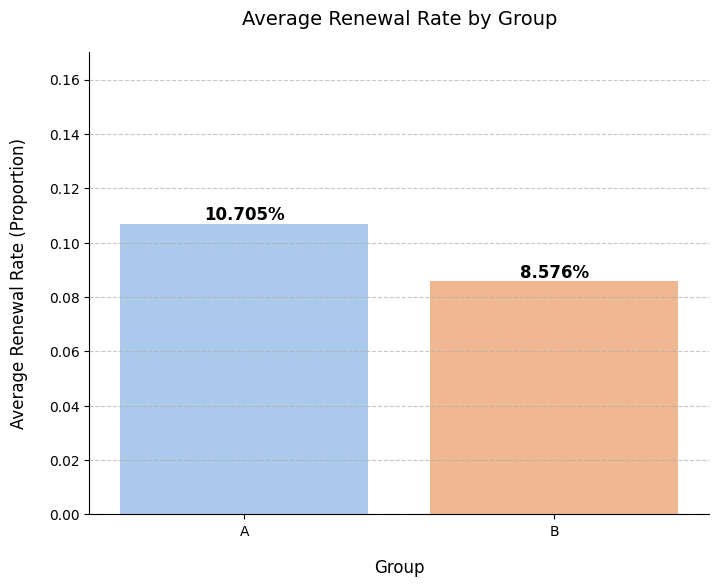

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
grouped_data = ab_test_data.groupby('组别')['续报结果'].mean().reset_index()
ax = sns.barplot(x='组别', y='续报结果', data=grouped_data, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3%}',  # 转换为百分比格式
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.ylim(0, 0.17)
plt.title('Average Renewal Rate by Group', fontsize=14, pad=20)
plt.xlabel('Group', fontsize=12, labelpad=15)
plt.ylabel('Average Renewal Rate (Proportion)', fontsize=12, labelpad=15)
sns.despine()  # 移除上边框和右边框
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加网格线，增强可读性
plt.show()


### 5.2 假设检验
- 由于我们的样本量比较大，我们可以使用正态近似来计算 p 值（即 Z 检验）

In [10]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# 计算 A 组和 B 组的续报人数和总人数
renewed_A = ab_test_data[ab_test_data["组别"] == "A"]["续报结果"].sum()
total_A = ab_test_data[ab_test_data["组别"] == "A"].shape[0]

renewed_B = ab_test_data[ab_test_data["组别"] == "B"]["续报结果"].sum()
total_B = ab_test_data[ab_test_data["组别"] == "B"].shape[0]

# 进行独立样本比例检验
count = np.array([renewed_A, renewed_B])  # 成功次数
nobs = np.array([total_A, total_B])  # 样本量
stat, p_value = proportions_ztest(count, nobs, alternative='larger')
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(count, nobs=nobs, alpha=0.05)

print(f"Z 统计量: {stat:.4f}, p 值: {p_value:.4f}")
print(f"实验组置信区间:[{lower_con:.3f}, {upper_con:.3f}]")
print(f'对照组置信区间: [{lower_treat:.3f}, {upper_treat:.3f}]')
# 结果解读
alpha = 0.05  # 设定显著性水平
if p_value < alpha:
    print("拒绝零假设：家访电话对续报率有显著提升！")
else:
    print("无法拒绝零假设：家访电话可能无效。")


Z 统计量: 3.0075, p 值: 0.0013
实验组置信区间:[0.097, 0.117]
对照组置信区间: [0.076, 0.095]
拒绝零假设：家访电话对续报率有显著提升！


### 5.3 假设检验结果
- Z 统计量： 3.0075
- p 值： 0.0013
- 显著性水平（α）： 0.05
- 由于 p 值（0.0056）小于 0.05，我们 拒绝零假设（即假设家访电话对续报率无影响），说明家访电话对续报率的提升 具有统计学显著性。

## 6. 结论与建议


### 6.1 结论
通过对数据的分析和多种方法的应用，以下结论得出：

1. A/B 测试结果：家访电话显著提升续报率

    - A/B 测试实验结果明确表明，家访电话的实施显著提高了续报率。此结果证明，家访电话是影响续报率的一个重要因素，尤其对于提高客户续报的意愿具有积极作用。因此，建议进一步加大家访电话的投入，以提高续报率。
2. KMeans 聚类分析：教师的销售水平对续报率影响较大

    - KMeans 聚类分析显示，教师的销售水平是影响续报率的关键因素。教师的销售能力与学生的续报情况呈正相关，销售水平较高的教师所带学生的续报率较高。因此，加强教师的销售培训和提升其销售水平，是提高整体续报率的有效策略。
3. 对于历史数据的EDA：流量渠道与城市线级的互动

    - 流量渠道中的口碑推荐、社群营销以及自有流量的续报率受城市线级的影响较为显著。在一线城市，以上三种流量渠道的续报率明显较高，而五线城市的续报率相对较低。这表明，一线城市的受众群体对于这些流量渠道的响应更为积极，而低线城市则可能存在不同的市场特征或需求。针对不同城市线级的特点，可以制定差异化的营销策略。
4. 对于ab测试数据的EDA：家访电话对续报率的影响因城市线级而异，家访电话对某些流量渠道产生反效果
    - A/B 测试结果显示，家访电话在大多数城市线级中对续报率有显著的正向影响。然而，四线城市的续报率并未受到家访电话的显著提升。这可能与四线城市的市场特征、客户群体或其他外部因素有关。
    - 在流量渠道的研究中，家访电话对某些渠道（如KOL推广和第三方合作）可能产生反效果。特别是在这两种流量渠道下，家访电话似乎并没有产生预期的正向影响，甚至可能导致客户续报率下降。
5. 销售水平与续报率的正相关性

    - 销售水平与续报结果之间呈正相关关系，即销售水平越高，续报率越高。这进一步证明了销售水平对于续报结果的关键作用，强调了提升销售人员的销售能力对提升续报率的重要性。
### 6.2 建议
1. 加大家访电话的推广

    - 基于A/B测试的显著结果，建议在未来的运营中加大家访电话的使用。家访电话不仅能提升客户的续报意愿，还能够建立更紧密的客户关系。建议在整体营销策略中优先考虑家访电话的推广，并考虑扩大其覆盖面。但同时要考虑根据城市线级优化家访电话策略并优化家访电话与流量渠道的组合。
2. 加强教师销售能力培训

    - 由于教师的销售水平对续报率影响较大，建议公司加大对教师销售技能的培训和支持。通过提高教师的销售水平，不仅能提高个人学生的续报率，也能整体提升所有学生的续报表现。可以提供定期的销售技巧培训和激励措施，以提升教师的销售水平。
3. 优化流量渠道策略

    - EDA分析的结果，建议优化流量渠道的分配和针对不同城市线级的市场定位。在线级较高的城市，进一步加大口碑推荐、社群营销和自有流量的投入。而对于低线城市，可以考虑寻找更适合的流量渠道，并且量身定制相应的市场营销策略。
4. 区域差异化营销策略

    - 根据城市线级对续报率的影响，建议制定差异化的营销策略。例如，可以根据城市线级的不同需求，调整广告投放、流量渠道的分配比例，以最大化不同地区的续报率。
5. 持续监控并调整策略

    - 建议定期进行数据监控，并根据不同的流量渠道、教师销售水平、城市线级等因素的变化及时调整策略。这将有助于发现新的机会和优化现有策略，进一步提升续报率。
通过以上措施，可以更有效地提高续报率，提升客户的满意度和忠诚度，从而为公司带来更长远的商业成功。

### 6.2 附加分析

#### 6.2.1 对于历史数据和ab测试数据的EDA在Tableau
#### 6.2.2 聚类分析
通过K-Means选出续报率较高的组，并分析目标组的特征

In [11]:

# 复制原始数据，并将列名翻译为英文
data_english = data.copy()
data_english.columns = ['StudentID', 'TeacherID', 'SalesLevel', 'CityTier', 'TrafficChannel', 'Period', 'RenewalResult']
city_tier_map = {
    '一线': 'Tier 1',
    '新一线': 'New Tier 1',
    '二线': 'Tier 2',
    '三线': 'Tier 3',
    '四线': 'Tier 4',
    '五线': 'Tier 5'
}

traffic_channel_map = {
    '自有流量': 'Owned Traffic',
    '社群营销': 'Community Marketing',
    '口碑推荐': 'Word of Mouth',
    '广告投放': 'Advertising',
    'KOL推广': 'KOL Promotion',
    '第三方合作': 'Third-Party Collaboration'
}
data_english['CityTier'] = data_english['CityTier'].map(city_tier_map)
data_english['TrafficChannel'] = data_english['TrafficChannel'].map(traffic_channel_map)



In [12]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 假设data是已经生成的数据
# 对分类变量进行独热编码

data_encoded = pd.get_dummies(data_english, columns=['CityTier', 'TrafficChannel'], drop_first=True)

# 选择用于聚类的特征
features = ['SalesLevel'] + list(data_encoded.columns[data_encoded.columns.str.startswith('CityTier_')]) + \
           list(data_encoded.columns[data_encoded.columns.str.startswith('TrafficChannel_')])

X_cluster = data_encoded[features]

/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.

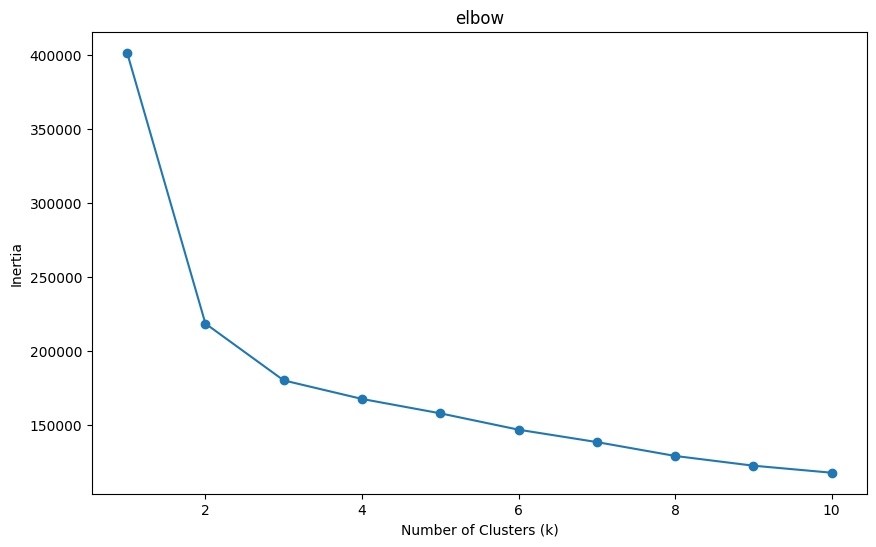

In [13]:
# 使用肘部法确定最佳聚类数量
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# 绘制肘部法图
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('elbow')
plt.show()

In [14]:
# 训练KMeans模型
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)
data_english['cluster'] = kmeans.fit_predict(X_cluster)

# 查看聚类结果
print(data_english['cluster'].value_counts())

/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    38780
1    34598
3    31708
2    14914
Name: count, dtype: int64


/var/folders/2c/_cxx_8dn5299vvrqzd5sv4y40000gn/T/ipykernel_17621/4164307910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='cluster', y='RenewalResult', data=data_english, palette='viridis', errorbar=None)
/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/han/Documents/Data_Science/.conda/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warni

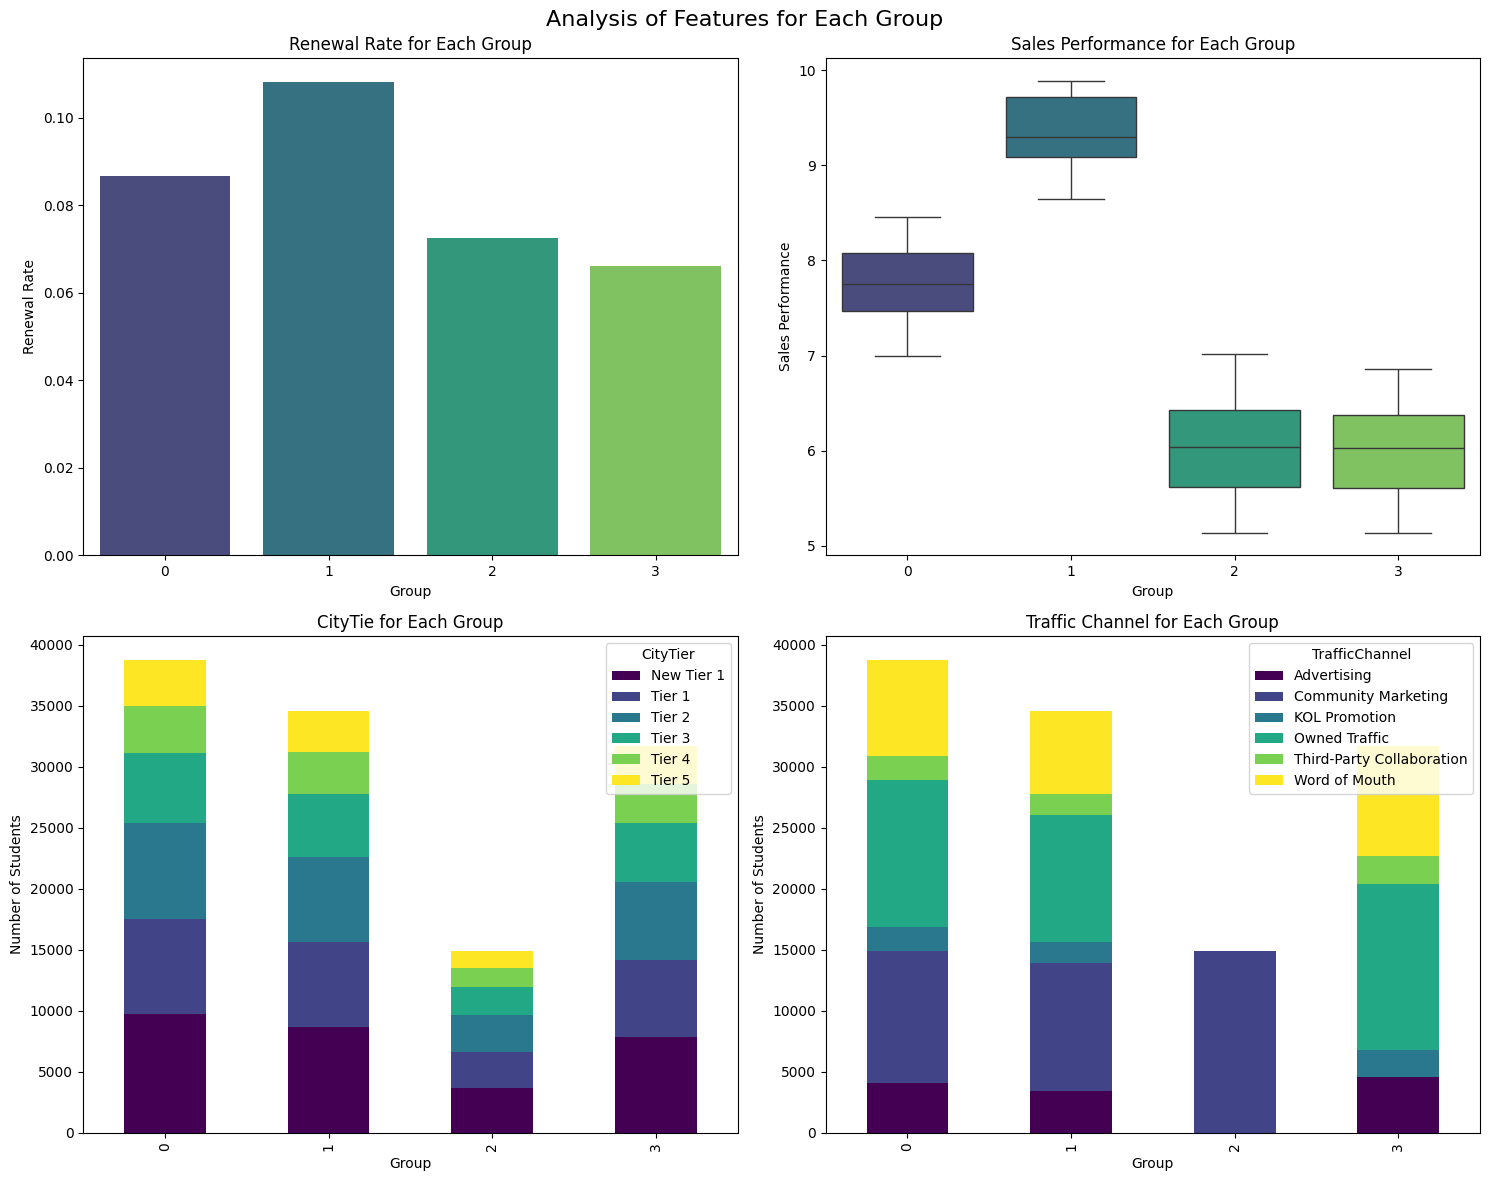

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analysis of Features for Each Group', fontsize=16)

# 1. 续报率分布
sns.barplot(ax=axes[0, 0], x='cluster', y='RenewalResult', data=data_english, palette='viridis', errorbar=None)
axes[0, 0].set_title('Renewal Rate for Each Group')
axes[0, 0].set_xlabel('Group')
axes[0, 0].set_ylabel('Renewal Rate')

# 2. 销售水平分布
sns.boxplot(ax=axes[0, 1], x='cluster', y='SalesLevel', data=data_english, palette='viridis')
axes[0, 1].set_title('Sales Performance for Each Group')
axes[0, 1].set_xlabel('Group')
axes[0, 1].set_ylabel('Sales Performance')

# 3. 城市线级分布
city_tier_distribution = data_english.groupby(['cluster', 'CityTier']).size().unstack()
city_tier_distribution.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('CityTie for Each Group')
axes[1, 0].set_xlabel('Group')
axes[1, 0].set_ylabel('Number of Students')

# 4. 流量渠道分布
channel_distribution = data_english.groupby(['cluster', 'TrafficChannel']).size().unstack()
channel_distribution.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Traffic Channel for Each Group')
axes[1, 1].set_xlabel('Group')
axes[1, 1].set_ylabel('Number of Students')



# 调整布局
plt.tight_layout()
plt.show()

In [17]:
ab_test_data.to_excel('abtesting.xlsx')